In [52]:
import numpy as np, matplotlib.pyplot as plt 
import torch
import pickle
from PIL import Image

In [53]:

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict

def unpickle(filepath):
    with open(filepath, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict

dataset1 = unpickle("cifar-10-batches-py/data_batch_1")
metadatafile = r'cifar-10-batches-py\batches.meta'
metadata = unpickle(metadatafile)

labels = metadata['label_names']
print(labels)
#print(dataset1[b'data'].shape)
training_data = dataset1['data']
training_data = training_data.reshape(len(training_data), 3, 32, 32)
training_data = training_data.transpose(0, 2,3,1)
training_labels = dataset1['labels']


['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


<font size = "6">Question 1: Single Convolution Function<font size= "6">

Image:


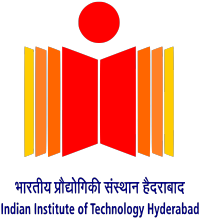

Kernel:
[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]
Image after convolution i.e activation map represented as greyscale image


C:\Users\Home\AppData\Local\Temp\ipykernel_16768\878025512.py:3: RuntimeWarning: overflow encountered in exp
  return (255 * (1 / (1 + np.exp(-x)))).astype(int)


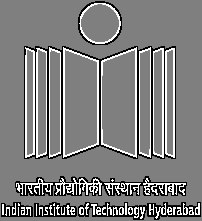

In [54]:

def sigmoid(x):
    # * function modified to give accurate values for the int form of image representation
    return (255 * (1 / (1 + np.exp(-x)))).astype(int)

def relu(x):
    return (x + np.abs(x)) / 2

def prelu(x):
    if (x > 0):
        return x
    else:
        param = 0.25 * np.random.randn() #normally this parameter is stored somewhere and learned, here randomly generated every time 
        return param * x


def get_conv_output_size(img, kernel, stride):
    # * This function assumes that the image is already padded as necessary
    x = int((img.shape[0] - kernel.shape[0]) / stride[0]) + 1
    y = int((img.shape[1] - kernel.shape[1]) / stride[1]) + 1
    z = img.shape[2]
    return x, y, z

def convolve(img, kernel, nlfunction, stride=[1,1], padding = [0,0]):
    
    
    if any(padding): 
 
        x_pad_side = padding[0]
        y_pad_side = padding[1]
        
        pad_matrix = np.zeros((img.shape[0] + x_pad_side*2, img.shape[1] + y_pad_side * 2, img.shape[2]))
        
        pad_matrix[x_pad_side:-x_pad_side, y_pad_side:-y_pad_side] = img

        img = pad_matrix.astype(int)
 


    x, y, z = get_conv_output_size(img, kernel, stride)
    conv_output = np.zeros((x, y))


    
    # *works with stride now
    for i in range(0, conv_output.shape[0]):
        for j in range(0, conv_output.shape[1]):
            
            i1 = int(i*stride[0])
            j1 = int(j*stride[1])
            window = img[i1:i1 + kernel.shape[0], j1:j1 + kernel.shape[1]]
            
            
            for k in range(window.shape[2]):#k is iterating fine
                
                conv_output[i, j] += np.sum(np.multiply(window[:, :, k], kernel)).astype(int)

    
    conv_output = nlfunction(conv_output)

    return conv_output

sharpen = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])
outline = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])
blur = np.array([
    [0.0625, 0.125, 0.0625],
    [0.125,  0.25,  0.125],
    [0.0625, 0.125, 0.0625]
])
emboss = np.array([
    [-2, -1, 0],
    [-1, 1, 1],
    [0, 1, 2]
])


img = Image.open('iithins.png')

print("Image:")
display(img)

image = np.asarray(img)
print("Kernel:")
print(outline)
convimg = convolve(image, outline, sigmoid, stride=[1,1], padding=[2, 2])

convimage = Image.fromarray(convimg.astype('uint8'))

print("Image after convolution i.e activation map represented as greyscale image")
display(convimage) 


<font size = "6">Question 2: Pooling Function<font size= "6">

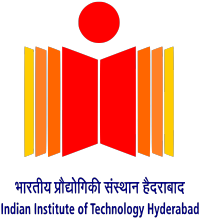

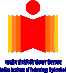

In [55]:
def get_pool_output_size(img, pooling_function_size, stride):
    x = int((img.shape[0] - pooling_function_size[0])/stride[0]) + 1
    y = int((img.shape[1] - pooling_function_size[1])/stride[1]) + 1
    z=0
    if(len(img.shape) < 3):
        z = 1
    else:
        z = img.shape[2]
    return x, y, z

def max_pool_3x3(matrix):
    return matrix.max()

def max_pool_2x2(matrix): #this function and the preceding function assume that the matrix given is of the correct size
    return matrix.max()


def pooling(img, pool_function, pooling_function_size, stride):
     
    x, y, z = get_pool_output_size(img, pooling_function_size, stride)

    pool_output = np.zeros((x,y,z))
    #print(pool_output.shape[2])
    for i in range(pool_output.shape[0]):
        for j in range(pool_output.shape[1]):

            i1 = i*stride[0]
            j1 = j*stride[1]
            window = img[i1:i1 + pooling_function_size[0], j1:j1 + pooling_function_size[1]]

            for k in range(pool_output.shape[2]):
                pool_output[i, j, k] = pool_function(window[:, :, k])
            
    return pool_output


img = Image.open('iithins.png')

display(img)

image = np.asarray(img)

poolimg = pooling(image, max_pool_3x3, np.array([3,3]), np.array([3,3]))

poolimage = Image.fromarray(poolimg.astype('uint8'))

display(poolimage) 




<font size = "6">Question 3: Convolution Layer Function<font size= "6">

Image:


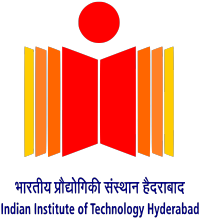

Kernels:
[[[ 0.0625  0.125   0.0625]
  [ 0.125   0.25    0.125 ]
  [ 0.0625  0.125   0.0625]]

 [[ 0.     -1.      0.    ]
  [-1.      5.     -1.    ]
  [ 0.     -1.      0.    ]]

 [[-1.     -1.     -1.    ]
  [-1.      8.     -1.    ]
  [-1.     -1.     -1.    ]]

 [[-2.     -1.      0.    ]
  [-1.      1.      1.    ]
  [ 0.      1.      2.    ]]]
output:
[[[ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  ...
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]]

 [[ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  ...
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]]

 [[ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  ...
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]]

 ...

 [[ 8.  0.  0.  0.]
  [10.  0.  0.  0.]
  [ 4.  0.  0.  0.]
  ...
  [ 4.  0.  0.  0.]
  [ 4.  0.  0.  0.]
  [ 7.  0.  0.  0.]]

 [[ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  ...
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  [ 0.  0.  0. 

In [56]:
def convolution_layer(img, kernels, kernel_dims, stride, padding, nlfunction):
    
    if padding.any(): 
        #let's do the padding first
        x_pad_side = padding[0]
        y_pad_side = padding[1]
        
        pad_matrix = np.zeros((img.shape[0] + x_pad_side*2, img.shape[1] + y_pad_side * 2, img.shape[2]))
        
        pad_matrix[x_pad_side:-x_pad_side, y_pad_side:-y_pad_side] = img

        img = pad_matrix.astype(int)
    
    #we want kernels to be n x dim1 x dim2
    #so that we can iterate over them

    conv_layer_output = [] #let's add every elem to a list, then concat them into one numpy array
    for i in range(kernels.shape[0]):

        conv_layer_output.append(convolve(img, kernels[i], nlfunction, stride[i], padding[i]))

    output = np.stack(conv_layer_output, axis=0)
    output = np.transpose(output, (1,2,0))
    return output
    
    
kerns = np.stack((blur,sharpen, outline, emboss), axis = 0)

img = Image.open('iithins.png')

print("Image:")
display(img)

print("Kernels:")
print(kerns)


image = np.asarray(img)
op = convolution_layer(image, kerns, kerns.shape, np.ones((4,2)), np.zeros((4,2)), relu)
print("output:")
print(op)

print("The shape of the output for 4 kernels is:")
print(op.shape)

<font size = "6">Question 4: Pooling Layer Function<font size= "6">

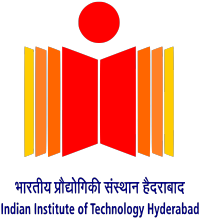

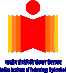

In [57]:
def avg_pool_3x3(matrix):
    return int(1 / 9 * matrix.sum())

def avg_pool_global(matrix):
    return int( 1 / (matrix.shape[0] * matrix.shape[1]) * matrix.sum())

def pooling_layer(img, pooling_function, pooling_function_size, stride, GAP=False): #we can do that if GAP is true, then the content of the other fields can be set to 0
   
    
    #here we will have global average pooling be an optional, that means that we can put 0, 0, 0 everywhere and it won't matter
    if GAP:
        #implementation of global average pooling 
        output = np.zeros((img.shape[2]))
        for i in range(img.shape[2]):
            output[i] = avg_pool_global(img[:, :, i])
    
    else:
        #case without global average pooling, in this case we just use the earlier defined pooling function
        #this function pools all the channels with the same pooling function
        output = pooling(img, pooling_function, pooling_function_size, stride)
    
    return output



img = Image.open('iithins.png')

display(img)

image = np.asarray(img)

poolimg = pooling_layer(image, max_pool_3x3, np.array([3,3]),  np.array([3,3]), GAP=False)

poolimage = Image.fromarray(poolimg.astype('uint8'))

display(poolimage) 


<font size = "6">Question 5:Flattening Function<font size= "6">

In [58]:
def flatten(img, target_size):
    #so this converts the image map to a vector of a specified size, this is done by mulitplying it with a weight matrix
    vector = img.flatten()
    

    transform_vector = np.random.randn(target_size, vector.shape[0])

    transformed_flattened = transform_vector @ vector

    return transformed_flattened

        
img = training_data[12]
print(flatten(img, 200))

[-9.41062260e+03 -9.40513760e+03  1.39864274e+04  1.79798287e+04
 -4.19480080e+03 -6.73567573e+03 -1.03313405e+04 -1.56077228e+04
 -5.66593673e+03  1.18053458e+04 -3.36176997e+03 -3.09769846e+03
  1.44787646e+04 -2.20164739e+04 -5.08082835e+03 -9.21483252e+02
 -4.89445818e+03  4.06957466e+02  2.32062097e+03 -2.54903058e+03
  3.79175020e+03  4.01257432e+03 -1.53398256e+04 -3.41876718e+03
 -3.07581847e+03 -9.14033355e+03 -8.33329859e+03 -1.28999134e+04
 -5.75031245e+03  2.00305721e+03  1.01598304e+04 -9.48032800e+03
  2.38545121e+03  2.27246527e+03 -9.53261670e+02  9.26184647e+03
  5.74708547e+03 -2.09122532e+03 -5.30702908e+03  1.33611754e+04
 -4.95405478e+02  1.06361618e+04  3.37262271e+03 -1.47998511e+04
 -4.43838500e+03 -1.03364183e+04 -4.87504128e+03  3.71257064e+03
  4.49043093e+03  6.02131753e+03 -1.44944371e+04  4.74856070e+03
 -1.16764445e+04 -1.72714061e+03  9.26529331e+02  4.25668693e+03
 -1.07057721e+04 -9.28466740e+03 -1.66237729e+03 -1.04099330e+04
  7.80449005e+03 -4.12001

<font size = "6">Question 6: MLP Function<font size= "6">

In [59]:
def softmax(input):
    return np.exp(input - np.max(input)) / np.sum(np.exp(input-np.max(input)))    #this is done to prevent overflow

def sigmoid_MLP(input): # * This is done because the previously defined sigmoid function was corrected to give integer pixel values i.e 0 to 255. This is the regular sigmoid function on real valued inputs with real valued outputs
    return 1 / ( 1 + np.exp(-input))

def MLP(input, num_layers, layer_sizes, output_size, nlfunction, softmax_op=False):
    
    output = input
    layers_input_sizes = np.concatenate((np.array([input.shape[0]]) , layer_sizes))

    for i in range(num_layers):
        layer =0.5 * np.random.randn(layers_input_sizes[i], layer_sizes[i])

        output = layer.T @ output
        output = nlfunction(output)

    layer = np.random.randn(layer_sizes[-1], output_size)
    output = layer.T @ output

    #here we evaluate whether to use softmax or not
    if softmax_op:
        output = softmax(output)

    return output

inp = np.random.uniform(low = -5, high = 5, size = 300)

#2 hidden layers
nl = 2
ls = np.array([100, 40])
ops = 10
x = MLP(inp, nl, ls, ops, relu, softmax_op=True)

x1 = MLP(inp, nl, ls, ops, relu, softmax_op=False)
#softmax is working, the input does seem like there is a high degree of confidence
print("without softmax:")
print(x1)
print("With softmax:")
print(x)



without softmax:
[ -88.94812844 -453.01514422  232.85051971 -858.85974221 -335.00529094
  255.84108373 -736.13829432  331.27354602 -375.31442105  511.13159375]
With softmax:
[0.00000000e+000 0.00000000e+000 0.00000000e+000 4.12962089e-208
 4.84760921e-210 2.30794073e-199 0.00000000e+000 0.00000000e+000
 1.99241659e-237 1.00000000e+000]


<font size = "6">Question 7: CNN Feed Forward Pipeline<font size= "6">

In [60]:
#we will pass the img to this pipeline
def empty():#function for the global average pooling layer call, since it did not seem appropriate to give a regular pooling function knowing it would never be used anyway
            #since the implementation of GAP done by me does not use any of the other parameters of the function call if the GAP value is set to True
    return 0
def feed_forward_CNN(img):
    
    #generate kernels 
    kernels1 = np.random.randn(16,3,3)
    convimg1 = convolution_layer(img, kernels1, kernels1.shape, np.ones((16,2)), np.zeros((16,2)), sigmoid)
    
    poolimg1 = pooling_layer(convimg1, max_pool_2x2, [2,2], [2,2], GAP=False)
    
    #generate more kernels (ideally these are learnt, but since there's no implementation of learning required they are randomly generated for now)
    #these can be global variables, or they can be object fields if these functions are combined into a class
    kernels2 = np.random.randn(8,3,3)
    convimg2 = convolution_layer(poolimg1, kernels2, kernels2.shape, np.ones((8,2)), np.zeros((8,2)), sigmoid)
    
    poolimg2 = pooling_layer(convimg2, max_pool_2x2, [2,2], [2,2], GAP=False)

    GAPimg = pooling_layer(poolimg2, empty, 0, 0, GAP=True) #the output of this should be 8x1

    output = MLP(GAPimg, 1, np.asarray([GAPimg.shape[0]]), 10, sigmoid_MLP, softmax_op=True)

    return GAPimg, output #this is for use during section 8b

img = training_data[13]
_, img_op = feed_forward_CNN(img)

print("output of CNN feed forward path:")
print(img_op)

C:\Users\Home\AppData\Local\Temp\ipykernel_16768\878025512.py:3: RuntimeWarning: overflow encountered in exp
  return (255 * (1 / (1 + np.exp(-x)))).astype(int)


output of CNN feed forward path:
[0.05327733 0.13069137 0.29352032 0.16415759 0.12073768 0.03024645
 0.05210574 0.12238921 0.00485392 0.02802041]


<font size = "6">Question 8a: CNN Feed Forward Output on Different Classes<font size= "6">

In [61]:
data_each_class = [30, 4, 6,9, 3, 27, 0, 7, 8, 1] #index numbers in training_data for images belonging to the classes, the labels of these images are the same as the order of labels in labels[]\

output_vectors = []
for i in range(len(data_each_class)):
    flattened_op, outputs = feed_forward_CNN(training_data[data_each_class[i]])
    output_vectors.append(outputs)


for i in range(10):
    print(output_vectors[i])
    print(labels[training_labels[data_each_class[i]]])
    print("max index is :" + str(np.argmax(output_vectors[i])))

C:\Users\Home\AppData\Local\Temp\ipykernel_16768\878025512.py:3: RuntimeWarning: overflow encountered in exp
  return (255 * (1 / (1 + np.exp(-x)))).astype(int)


[0.40709102 0.13178002 0.00284025 0.00268841 0.40868399 0.00754981
 0.00911151 0.01757538 0.00524712 0.00743249]
airplane
max index is :4
[1.64882747e-04 5.33313660e-04 1.10001761e-02 8.65471505e-01
 1.33057444e-02 7.96467620e-02 1.85974932e-03 6.50585047e-03
 1.42669537e-02 7.24506271e-03]
automobile
max index is :3
[0.08773278 0.41659635 0.00805506 0.01147657 0.01361753 0.00466377
 0.27763309 0.06682417 0.02679183 0.08660886]
bird
max index is :1
[0.07092366 0.00411939 0.05726637 0.00406789 0.00090986 0.0301634
 0.37300023 0.15819377 0.12668422 0.17467122]
cat
max index is :6
[0.09657048 0.00298086 0.37886115 0.00443533 0.00436513 0.20225633
 0.02287431 0.03673262 0.22364546 0.02727833]
deer
max index is :2
[0.08735879 0.01674262 0.15489819 0.07838355 0.17023534 0.06682479
 0.28645142 0.00340663 0.09544489 0.04025377]
dog
max index is :6
[0.01355566 0.15308216 0.17795059 0.0140732  0.02952808 0.21096792
 0.08515604 0.04311705 0.0408248  0.2317445 ]
frog
max index is :9
[9.72063357e-0

No significant trends were seen in the classification. This is probably because all of the parameters of the CNN were randomly initialized on feed-forward, therefore there is no learning being done before any of the passes. 